In [1]:
import tensorflow as tf
from tensorflow import keras
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn import model_selection

In [2]:
data = pd.read_csv("fashion-mnist_train.csv")

In [3]:
data.head(10)

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,4,0,0,0,5,4,5,5,3,5,...,7,8,7,4,3,7,5,0,0,0
6,4,0,0,0,0,0,0,0,0,0,...,14,0,0,0,0,0,0,0,0,0
7,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,4,0,0,0,0,0,0,3,2,0,...,1,0,0,0,0,0,0,0,0,0
9,8,0,0,0,0,0,0,0,0,0,...,203,214,166,0,0,0,0,0,0,0


In [4]:
data = open("fashion-mnist_train.csv")

In [5]:
f = data.readlines()
count = 0
for i in f:
    count += 1

In [6]:
print(count)

60001


In [7]:
X = np.zeros((count-1,784))
y = np.zeros((count-1,1))

In [8]:
for i in range(1,count):
    line=f[i].split(",")
    y[i-1] = line[0]
    X[i-1] = line[1:]

In [19]:
X = X.reshape(60000, 28, 28, 1)

In [20]:
X.shape

(60000, 28, 28, 1)

In [21]:
count_Class = pd.value_counts(data["label"], sort = True)
count_Class.plot("bar")
plt.show()

TypeError: '_io.TextIOWrapper' object is not subscriptable

In [ ]:
y = data["label"]
X = np.zeros((60000,784))
X = data.loc[:,'pixel1':'pixel784']

In [22]:
y.shape

(60000, 1)

In [23]:
X.shape

(60000, 28, 28, 1)

In [24]:
X_train, X_val, y_train, y_val = model_selection.train_test_split(X, y)

In [25]:
y_train_oh = keras.utils.to_categorical(y_train, 10)
y_val_oh = keras.utils.to_categorical(y_val, 10)

In [26]:
y_val.shape

(15000, 1)

In [27]:
X_train = X_train/255
X_val = X_val/255

In [31]:
model = keras.models.Sequential([
    tf.keras.layers.Conv2D(
        32, (3, 3), activation="relu", input_shape=(28, 28, 1), padding = "same"
    ),

    # Max-pooling layer, using 2x2 pool size
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),

    # Flatten units
    tf.keras.layers.Flatten(),

    tf.keras.layers.Dense(128, activation = "relu"),
    tf.keras.layers.Dropout(0.5),

    tf.keras.layers.Dense(10, activation = "sigmoid")
])

In [32]:
model.compile(
    optimizer = "adam",
    loss = "categorical_crossentropy",
    metrics = ["accuracy"]
)

In [33]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 32)        320       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 6272)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               802944    
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 10)                1290      
Total params: 804,554
Trainable params: 804,554
Non-trainable params: 0
________________________________________________

In [35]:
model.fit(X_train, y_train_oh, epochs = 25)

Train on 45000 samples
Epoch 1/25
45000/45000 [==============================] - 41s 917us/sample - loss: 0.5659 - accuracy: 0.7995
Epoch 2/25
45000/45000 [==============================] - 39s 859us/sample - loss: 0.3721 - accuracy: 0.8656
Epoch 3/25
45000/45000 [==============================] - 38s 848us/sample - loss: 0.3272 - accuracy: 0.8830
Epoch 4/25
45000/45000 [==============================] - 39s 858us/sample - loss: 0.2981 - accuracy: 0.8930
Epoch 5/25
45000/45000 [==============================] - 40s 899us/sample - loss: 0.2779 - accuracy: 0.8986- loss: - ETA: 0s - loss: 0.2780 - accuracy: 0.
Epoch 6/25
45000/45000 [==============================] - 35s 770us/sample - loss: 0.2612 - accuracy: 0.9043
Epoch 7/25
45000/45000 [==============================] - 29s 650us/sample - loss: 0.2437 - accuracy: 0.9095
Epoch 8/25
45000/45000 [==============================] - 28s 620us/sample - loss: 0.2324 - accuracy: 0.9129
Epoch 9/25
45000/45000 [==============================] - 

In [38]:
model.evaluate(X_val, y_val_oh, verbose = 2)

15000/15000 - 4s - loss: 0.3084 - accuracy: 0.9207


[0.3084290106460452, 0.92073333]

In [39]:
data2 = open("fashion-mnist_test.csv")

f2 = data2.readlines()

count2=0

for i in f2:
    count2+=1
# count2-=1
print(count2)

10001


In [66]:
X_test = np.zeros((count2-1,784), dtype=np.uint8)
Y_test2 = np.zeros((count2-1,1))
for i in range(1,count2):
    Xx = f2[i].split(",")
    Y_test2[i-1] = Xx[0]
    X_test[i-1] = Xx[1:]
X_test = X_test/255

In [67]:
Y_test2.shape

(10000, 1)

In [68]:
X_test = X_test.reshape(10000, 28, 28, 1)
Y_test = keras.utils.to_categorical(Y_test2,10)

In [45]:
y_test = model.predict(X_test)

In [69]:
y_pred_test = model.predict(X_test)
y_pred_test_classes = np.argmax(y_pred_test, axis=1)
y_pred_test_max_probas = np.max(y_pred_test, axis=1)

In [77]:
y_pred_test_max_probas

array([0.71966624, 0.97611   , 0.0902218 , ..., 0.9886798 , 0.11117621,
       0.4498217 ], dtype=float32)

In [57]:
y_test = keras.utils.to_categorical(y_pred_test_classes, 10)

In [79]:
y_pred_test_classes.shape

(10000,)

In [81]:
Y_test2.shape

(10000, 1)

Test accuracy: 0.9207


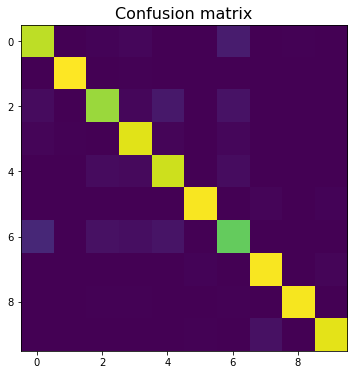

In [83]:
from sklearn.metrics import confusion_matrix, accuracy_score
plt.figure(figsize=(7, 6))
plt.title('Confusion matrix', fontsize=16)
plt.imshow(confusion_matrix(Y_test2, y_pred_test_classes))
plt.show
print("Test accuracy:", accuracy_score(Y_test2, y_pred_test_classes))

In [ ]:
with open('submission.csv', mode='w', newline='') as employee_file:
    employee_writer = csv.writer(employee_file, delimiter=',', quotechar='y', quoting=csv.QUOTE_MINIMAL)
    employee_writer.writerow(['ImageId', 'Label'])
    for i in range(count2-1):
        employee_writer.writerow([i+1, y[i][0]])
